In [1]:
'''
Задание 8. Загрузка результатов в БД
Соберите данные о моделях холодильников Саратов с маркетплейса beru.ru: 
URL, название, цена, размеры, общий объем, объем холодильной камеры.
Создайте соответствующие таблицы в SQLite базе данных и загрузите полученные данные в таблицу beru_goods.
Для парсинга можно использовать зеркало страницы beru.ru с результатами для холодильников Саратов по адресу:
video.ittensive.com/data/018-python-advanced/beru.ru/
Какая ширина у холодильника Саратов 264 в см?
'''

import sqlite3 # Импортирование библиотеки Sqlite3
import requests # Импортирование библиотеки Requests
from bs4 import BeautifulSoup # Импортирование библиотеки BeautifulSoup из пакета bs4
# https://video.ittensive.com/data/018-python-advanced/beru.ru/kholodilnik-saratov-452-ksh-120.html
# /kholodilnik-saratov-452-ksh-120.html

def find_number(text): # Функция вычленения из тега числа
    return int("0" + "".join(i for i in text if i.isdigit())) # Приведение строки к целому числу
def find_data (link): # Функция для парсинга веб-страницы   
    r = requests.get("https://video.ittensive.com/data/018-python-advanced/beru.ru/" + link) # Получение данных с сайта
    html = BeautifulSoup(r.content) # Получение html-кода веб-страницы 
    # print (html) # вывод содержания html-страницы
    title = html.find("h1", {"class": "_3TfWusA7bt _26mXJDBxtH"}).get_text() # Поиск информации по обозначенным тэгам
    # print (title) # вывод заголовков
    price = find_number(html.find("span", {"data-tid": "c3eaad93"}).get_text()) # Поиск цены, приведение строки к числу
    tags = html.find_all("span", {"class": "_112Tad-7AP"}) # Поиск всех параметров и присвоение им переменных
    width = 0 # ширина
    depth = 0 # глубина
    height = 0 # высота
    volume = 0 # общий объём
    freezer = 0 # объём морозильной камеры
    for tag in tags: # Перебор тэгов и вычленение параметров
        tag = tag.get_text() # взятие из тэга текста 
        if tag.find("ШхВхГ") > -1: # если в строке присутствует "ШхВхГ" 
            dims = tag.split(":")[1].split("х") 
            # разделение строки по «:» с первым индексом, разделение по «х», затем приведение значений к числам 
            width = float(dims[0]) # ширина первое значение
            depth = float(dims[1]) # глубина второе значение
            height = float(dims[2].split(" ")[0]) 
            # высота третье значение, разделение по пробелу и взятие только первого элемента
        if tag.find("общий объем") > -1: # если в тэге есть «Общий объём»
            volume = find_number(tag) # вычленение из тэга числа
        if tag.find("объем холодильной камеры") > -1: # если в тэге есть обозначенное значение
            freezer = find_number(tag) # вычленение из тэга числа
    return [link, title, price, width, depth, height, volume, freezer] # вывод значений переменных
   


# print (find_data("/kholodilnik-saratov-452-ksh-120.html")) # вывод инфорации после парсинга данной веб-страницы
print ("----------------------------------------------------------------------------------------------------------------")
# Вывод разделяющей строки для лучшего восприятия данных

r = requests.get("https://video.ittensive.com/data/018-python-advanced/beru.ru") 
# Получение данных с сайта
html = BeautifulSoup(r.content) # Получение кода html-страницы
# print (html) # вывод html-кода
links = html.find_all("a", {"class": "Usp3kX1MNT"}) # Поиск всех ссылок
data = [] # Создание массива данных
for link in links: # Перебор всех ссылок по одной
    if link["href"] and link.get_text().find("Саратов") > -1: # если есть атрибут ссылки и содержит текст «Саратов»
        data.append(find_data(link["href"])) # добавление в список результата работы функции
        
conn = sqlite3.connect("C:\\My files\\SQLITE\\data.db3") 
# Соединение с базой данных
db = conn.cursor() # Соединение базы данных SQLite  
# запрос по созданию таблицы:
db.execute("""CREATE TABLE beru_goods 
            (id INTEGER PRIMARY KEY AUTOINCREMENT not null,
            url text,
            title text default '',
            price INTEGER default 0,
            width FLOAT default 0.0,
            depth FLOAT default 0.0,
            height FLOAT default 0.0,
            volume INTEGER default 0,
            freezer INTEGER default 0)""")
conn.commit() # запись операции
db.executemany("""INSERT INTO beru_goods (url, title, price, width, depth, height, volume, freezer) 
           VALUES (?, ?, ?, ?, ?, ?, ?, ?)""", data) 
# передача полученных данных в БД одним запросом
# в качестве параметров передаются данные
conn.commit() # запись операции
print (db.execute("SELECT * FROM beru_goods").fetchall()) # вывод значений из созданной БД
db.close() # закрытие соединения с БД


----------------------------------------------------------------------------------------------------------------
[(1, 'kholodilnik-saratov-452-ksh-120.html', 'Холодильник Саратов 452 (КШ-120)', 10728, 48.0, 89.6, 60.0, 122, 107), (2, 'kholodilnik-saratov-263-kshd-200-30.html', 'Холодильник Саратов 263 (КШД-200/30)', 14299, 48.0, 149.0, 60.0, 195, 165), (3, 'kholodilnik-saratov-209-kshd-275-65.html', 'Холодильник Саратов 209 (КШД 275/65)', 13292, 60.0, 163.0, 60.6, 275, 210), (4, 'kholodilnik-saratov-209-belyi-s-chernymi-nakladkami.html', 'Холодильник Саратов 209 белый с черными накладками', 18259, 60.0, 163.0, 61.0, 275, 210), (5, 'kholodilnik-saratov-452-ksh-120-seryi.html', 'Холодильник Саратов 452 (КШ-120) серый', 10946, 48.0, 89.6, 60.0, 122, 107), (6, 'kholodilnik-saratov-550-ksh-120-bez-nto.html', 'Холодильник Саратов 550 (КШ-120 без НТО)', 10545, 48.0, 87.5, 59.0, 122, 0), (7, 'kholodilnik-saratov-467-ksh-210.html', 'Холодильник Саратов 467 (КШ-210)', 13523, 48.0, 149.0, 60.0, 2

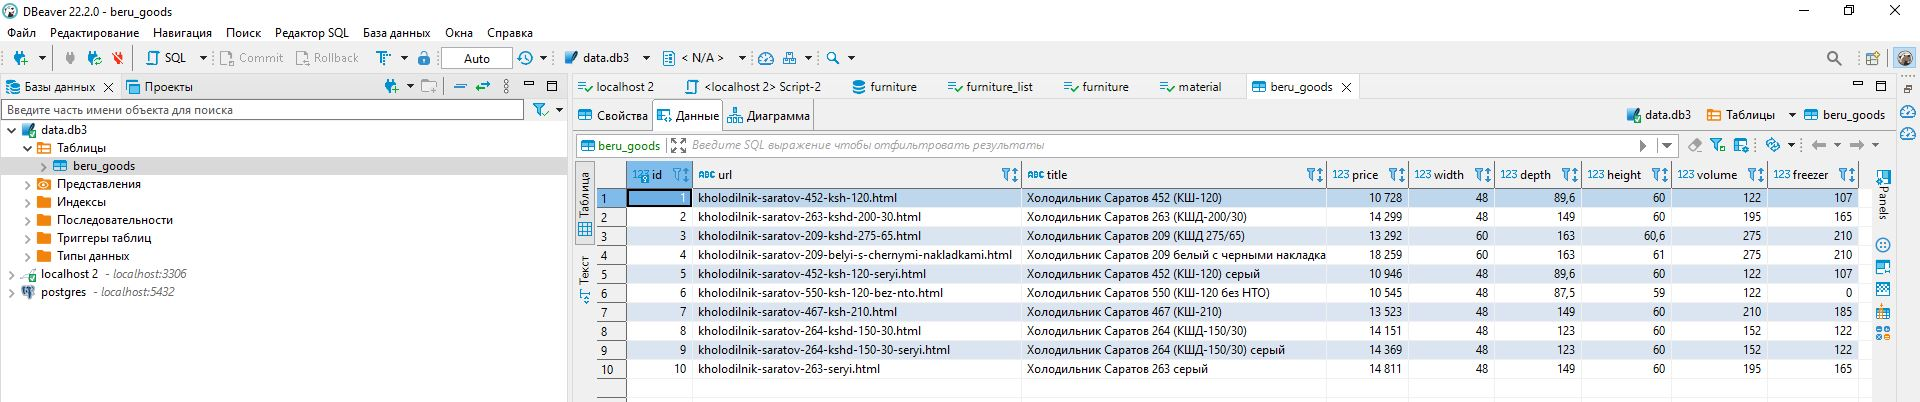